##### Import Libraries

In [73]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

##### Load Data

In [74]:
df = pd.read_csv("cancer.csv")         # Reading the dataset to Data Frame

##### Explore Data

In [75]:
df.head()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
0,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,Malignant
1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,Malignant
2,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,Malignant
3,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.2597,Malignant
4,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,Malignant


In [76]:
df.shape

(569, 8)

In [77]:
df.diagnosis.value_counts()

diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

The statistics about the dataset

In [78]:
y = df.diagnosis                                                # predict this (Dependent Variable)
x = df.drop(columns=["diagnosis"])

Split the Dataset for Testing and Training

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=df.diagnosis)

In [80]:
x_train.head()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
78,20.18,143.70,1245.0,0.12860,0.34540,0.37540,0.2906
330,16.03,105.80,793.2,0.09491,0.13710,0.12040,0.1782
378,13.66,88.27,580.6,0.08268,0.07548,0.04249,0.1792
213,17.42,114.50,948.0,0.10060,0.11460,0.16820,0.1308
89,14.64,95.77,651.9,0.11320,0.13390,0.09966,0.2116


In [81]:
x_train.shape

(398, 7)

In [82]:
y_train.value_counts()

diagnosis
Benign       250
Malignant    148
Name: count, dtype: int64

### Train the model

In [83]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [84]:
tree_clf.classes_

array(['Benign', 'Malignant'], dtype=object)

In [85]:
export_graphviz(
                 tree_clf,
                 out_file="cancer.dot",
                 feature_names=x.columns,
                 class_names=tree_clf.classes_,
                 rounded=True,
                 filled=True
                )

You can visualize the dot file at <a href="http://www.webgraphviz.com" target="_blank">www.webgraphviz.com</a>

### Accuracy of the model:

In [86]:
print("Training set accuracy: {:.3f}".format(tree_clf.score(x_train, y_train)))
print("Testing set accuracy: {:.3f}".format(tree_clf.score(x_test, y_test)))

Training set accuracy: 1.000
Testing set accuracy: 0.877


In [87]:
actual = y_test
predicted = tree_clf.predict(x_test)

### Test the Model

In [88]:
tree_clf.feature_importances_

array([0.01983929, 0.63116826, 0.04110977, 0.05407373, 0.02794149,
       0.18087248, 0.04499498])

In [89]:
x.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean'],
      dtype='object')

In [90]:
import matplotlib.pyplot as plt

<BarContainer object of 7 artists>

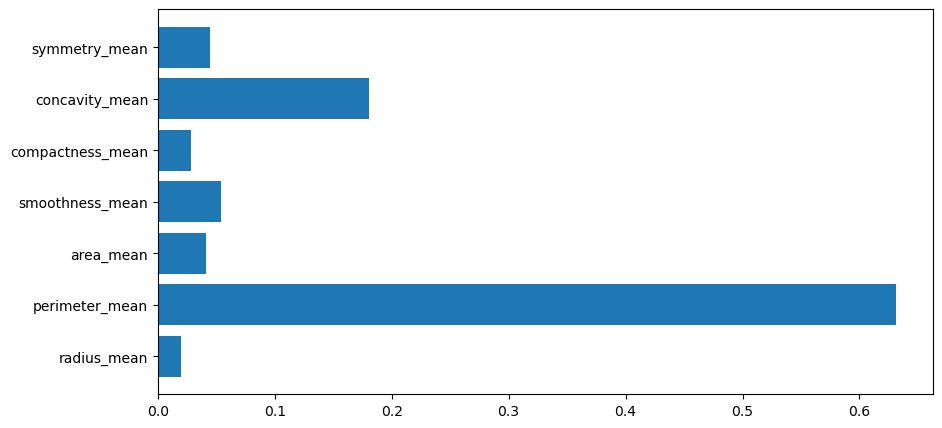

In [91]:
plt.figure(figsize=(10,5))
plt.barh(x.columns,tree_clf.feature_importances_)